In [4]:
import os
import json
from PIL import Image, ImageDraw
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import shutil
import tensorflow as tf

# Load Data

In [5]:
json_0313 = [json.loads(line) for line in open('./train_set/label_data_0313.json')]
json_0531 = [json.loads(line) for line in open('./train_set/label_data_0531.json')]
json_0601 = [json.loads(line) for line in open('./train_set/label_data_0601.json')]
json_test = [json.loads(line) for line in open('./test_set/test_tasks_0627.json')]

### Train and validation data


In [6]:
json_train = json_0313 + json_0531 + json_0601 #join train data

In [7]:
lanes = []
h_samples =[]
raw_file =[]

for data in json_train:
    lanes.append(data['lanes'])
    h_samples.append(data['h_samples'])
    raw_file.append(data['raw_file'])
       
data_train = pd.DataFrame({'lanes':lanes,'h_samples':h_samples,'raw_file':raw_file})


### Test data

In [8]:
raw_file =[]    
for data in json_test:
    raw_file.append(data['raw_file'])   
    
data_test = pd.DataFrame({'raw_file':raw_file})

# Visualizations

In [9]:
exem = data_train.iloc[999]

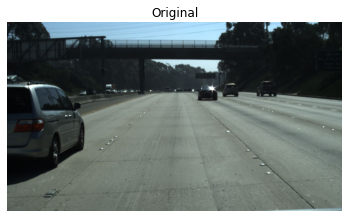

In [10]:
img = plt.imread('./train_set/'+exem['raw_file'])
plt.title('Original')
plt.axis('off')
plt.imshow(img)
plt.show()

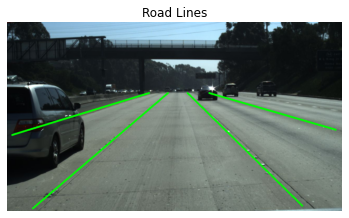

In [11]:
gt_lanes_vis = [[(x, y) for (x, y) in zip(lane, exem['h_samples']) if x >= 0] for lane in exem['lanes']] #for each value in lanes there is a corresponding value in h_samples
img_vis = img.copy()

for lane in gt_lanes_vis:
    cv2.polylines(img_vis, np.int32([lane]), isClosed=False, color=(0,255,0), thickness=5)  #draw lines

plt.title('Road Lines')
plt.axis('off')
plt.imshow(img_vis)
plt.show()

In [14]:
width = 1280
height = 720

img1 = Image.new('L', (width, height), 0)
for lane in gt_lanes_vis:
    ImageDraw.Draw(img1).line(lane, width=8,  fill=1)  #draw mask
mask = np.array(img1)

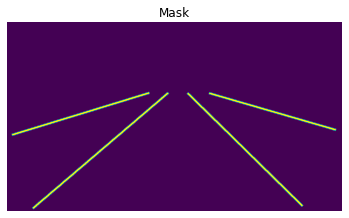

In [15]:
plt.title('Mask')
plt.axis('off')
plt.imshow(mask)
plt.show()

# Generate Train and Validation Labeled Masks

In [ ]:
path_old_image = './train_set/'
path_new_image = './images/'
path_mask = './masks/'

try:
    for diretorio in [path_new_image, path_mask]:
        for file in os.listdir(diretorio):
            os.remove(os.path.join(diretorio,file))
except:
    os.mkdir(path_new_image)
    os.mkdir(path_mask)

for lanes, h_samples, raw_file in data_train.values:
    file_name_old = raw_file
    file_name_new = ''.join(file_name_old.split('/')[2:])
    file_name_new = file_name_new.replace('jpg','png')
    shutil.copy(path_old_image+file_name_old,
                path_new_image+file_name_new) 
    
    gt_lanes_vis = [[(x, y) for (x, y) in zip(lane, h_samples) if x >= 0] for lane in lanes]
    width = 1280
    height = 720

    img = Image.new('L', (width, height), 0)
    for lane in gt_lanes_vis:
        ImageDraw.Draw(img).line(lane, width=8,  fill=1)  
 
    mask = np.array(img)
    cv2.imwrite(path_mask+file_name_new,mask)  

### Validation and Train Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = os.listdir('./images/')
y = os.listdir('./masks/')

x_train, x_valid, _, _ = train_test_split(x,y,test_size=0.20)

In [ ]:
path_old_image = './images/'
path_new_image = './train_images/'
path_old_mask = './masks/'
path_new_mask = './train_masks/'

try:
    for diretorio in [path_new_image, path_new_mask]:
        for file in os.listdir(diretorio):
            os.remove(os.path.join(diretorio,file))
except:
    os.mkdir(path_new_image)
    os.mkdir(path_new_mask)

for img in x_train:
    shutil.copy(path_old_image+img,
                path_new_image+img)
    shutil.copy(path_old_mask+img,
                path_new_mask+img)
    
path_new_image = './valid_images/'
path_new_mask = './valid_masks/'

try:
    for diretorio in [path_new_image, path_new_mask]:
        for file in os.listdir(diretorio):
            os.remove(os.path.join(diretorio,file))
except:
    os.mkdir(path_new_image)
    os.mkdir(path_new_mask)

for img in x_valid:
    shutil.copy(path_old_image+img,
                path_new_image+img) 
    shutil.copy(path_old_mask+img,
                path_new_mask+img) 
    

# Generate Test Images

In [ ]:
path_old_image = './test_set/'
path_new_image = './test_images/'


try:
    for diretorio in [path_new_image]:
        for file in os.listdir(diretorio):
            os.remove(os.path.join(diretorio,file))
except:
    os.mkdir(path_new_image)

for raw_file in data_test.values:
    file_name_old = raw_file[0]
    file_name_new = ''.join(file_name_old.split('/')[2:])
    file_name_new = file_name_new.replace('jpg','png')
    
    shutil.copy(path_old_image+file_name_old,
                path_new_image+file_name_new)  